<a href="https://colab.research.google.com/github/ValerieLangat/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Valerie_Langat_Unit_1_Sprint_2_Coding_Challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [2]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [3]:
df_1 = (pd.merge(cell_phones, population, on=['time', 'geo'], how='inner'))
print(df_1)

      geo  time  cell_phones_total  population_total
0     afg  1960                0.0           8996351
1     afg  1965                0.0           9938414
2     afg  1970                0.0          11126123
3     afg  1975                0.0          12590286
4     afg  1976                0.0          12840299
5     afg  1977                0.0          13067538
6     afg  1978                0.0          13237734
7     afg  1979                0.0          13306695
8     afg  1980                0.0          13248370
9     afg  1981                0.0          13053954
10    afg  1982                0.0          12749645
11    afg  1983                0.0          12389269
12    afg  1984                0.0          12047115
13    afg  1985                0.0          11783050
14    afg  1986                0.0          11601041
15    afg  1987                0.0          11502761
16    afg  1988                0.0          11540888
17    afg  1989                0.0          11

In [4]:
df_1.shape

(8590, 4)

In [5]:
geo_country_codes.head()
columns = geo_country_codes[['geo', 'country']]
columns

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla
5,akr_a_dhe,Akrotiri and Dhekelia
6,ala,Åland
7,alb,Albania
8,and,Andorra
9,ant,Netherlands Antilles


In [6]:
df_2 = (pd.merge(df_1, columns, on='geo'))
df_2.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [7]:
df_2.shape

(8590, 5)

Calculate number of cell phones per person

In [8]:
df_2['Phones_Per_Person'] = df_2['cell_phones_total']/df_2['population_total']
df_2.tail()

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
8585,zwe,2013,13633167.0,15054506,Zimbabwe,0.905587
8586,zwe,2014,11798652.0,15411675,Zimbabwe,0.765566
8587,zwe,2015,12757410.0,15777451,Zimbabwe,0.808585
8588,zwe,2016,12878926.0,16150362,Zimbabwe,0.797439
8589,zwe,2017,14092104.0,16529904,Zimbabwe,0.852522


In [9]:
usa = df_2[df_2['country'] == 'United States']
usa[usa['time'].isin([2015, 2016, 2017])]

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
8132,usa,2015,382307000.0,319929162,United States,1.194974
8133,usa,2016,395881000.0,322179605,United States,1.228759
8134,usa,2017,395881000.0,324459463,United States,1.220125


In [10]:
df_2['country'].groupby(df_2['time']).describe()

,count,unique,top,freq
time,,,,
1960,184,184,Estonia,1
1965,184,184,Estonia,1
1970,184,184,Estonia,1
1975,184,184,Estonia,1
1976,184,184,Estonia,1
1977,184,184,Estonia,1
1978,184,184,Estonia,1
1979,184,184,Estonia,1
1980,184,184,Estonia,1


In [11]:
df_2.describe()

,time,cell_phones_total,population_total,Phones_Per_Person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [12]:
df_2['country'].groupby(df_2['time']).describe()

,count,unique,top,freq
time,,,,
1960,184,184,Estonia,1
1965,184,184,Estonia,1
1970,184,184,Estonia,1
1975,184,184,Estonia,1
1976,184,184,Estonia,1
1977,184,184,Estonia,1
1978,184,184,Estonia,1
1979,184,184,Estonia,1
1980,184,184,Estonia,1


In [0]:
df_2.dropna(inplace=True)

In [0]:
df_2['geo'] = df_2['geo'].apply(lambda x: x.upper())

In [32]:
df_2.head()

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
0,AFG,1960,0.00%,8996351,Afghanistan,0.00%
1,AFG,1965,0.00%,9938414,Afghanistan,0.00%
2,AFG,1970,0.00%,11126123,Afghanistan,0.00%
3,AFG,1975,0.00%,12590286,Afghanistan,0.00%
4,AFG,1976,0.00%,12840299,Afghanistan,0.00%


In [16]:
df_2.describe(include='all')

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
count,8590,8590.000000,8.590000e+03,8.590000e+03,8590,8590.000000
unique,195,NaN,NaN,NaN,195,NaN
top,ben,NaN,NaN,NaN,Estonia,NaN
freq,46,NaN,NaN,NaN,46,NaN
mean,NaN,1994.193481,9.004950e+06,2.983823e+07,NaN,0.279639
std,NaN,14.257975,5.573408e+07,1.161284e+08,NaN,0.454247
min,NaN,1960.000000,0.000000e+00,4.433000e+03,NaN,0.000000
25%,NaN,1983.000000,0.000000e+00,1.456148e+06,NaN,0.000000
50%,NaN,1995.000000,6.200000e+03,5.725062e+06,NaN,0.001564
75%,NaN,2006.000000,1.697652e+06,1.810581e+07,NaN,0.461149


In [33]:
usage_2017 = df_2[df_2['time'] == 2017]
usage_2017

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
45,AFG,2017,"2,392,971,300.00%",35530081,Afghanistan,67.35%
91,AGO,2017,"1,332,395,200.00%",29784193,Angola,44.73%
137,ALB,2017,"349,795,000.00%",2930187,Albania,119.38%
183,AND,2017,"8,033,700.00%",76965,Andorra,104.38%
219,ARE,2017,"1,982,622,400.00%",9400145,United Arab Emirates,210.91%
265,ARG,2017,"6,189,737,900.00%",44271041,Argentina,139.81%
311,ARM,2017,"348,852,400.00%",2930450,Armenia,119.04%
396,AUS,2017,"2,755,300,000.00%",24450561,Australia,112.69%
442,AUT,2017,"1,492,434,000.00%",8735453,Austria,170.85%
488,AZE,2017,"1,012,700,000.00%",9827589,Azerbaijan,103.05%


In 2017, China, India, Indonesia, USA and Brazil had the most cell phones

In [34]:
usage_2017.sort_values('cell_phones_total', ascending=False).head(5)

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
1496,CHN,2017,"147,409,700,000.00%",1409517397,China,104.58%
3595,IND,2017,"116,890,227,700.00%",1339180127,India,87.28%
3549,IDN,2017,"45,892,320,200.00%",263991379,Indonesia,173.84%
8134,USA,2017,"39,588,100,000.00%",324459463,United States,122.01%
1084,BRA,2017,"23,648,854,800.00%",209288278,Brazil,113.00%


2014 is when the United States first had more cell phones than people.

In [35]:
usa = df_2[df_2['country'] == "United States"]
usa[usa['time'].isin([2013, 2014, 2015, 2016])]

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
8130,USA,2013,"31,069,800,000.00%",315536676,United States,98.47%
8131,USA,2014,"35,550,000,000.00%",317718779,United States,111.89%
8132,USA,2015,"38,230,700,000.00%",319929162,United States,119.50%
8133,USA,2016,"39,588,100,000.00%",322179605,United States,122.88%


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [22]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [23]:
Per_Year = df['Occupation'].groupby(df['Year']).describe()
Per_Year

,count,unique,top,freq
Year,,,,
1999,166,4,"Acting, Comedy & Music",150
2000,169,4,"Acting, Comedy & Music",125
2001,157,4,"Acting, Comedy & Music",114
2002,159,4,"Acting, Comedy & Music",99
2003,166,4,"Acting, Comedy & Music",93
2004,164,4,"Acting, Comedy & Music",63
2005,162,4,"Acting, Comedy & Music",60
2006,161,4,"Acting, Comedy & Music",58
2007,141,4,Media,47


In [0]:
pd.options.display.float_format = '{:,.2%}'.format

In [25]:
Per_Year['Breakdown'] = Per_Year['freq']/Per_Year['count']
Per_Year

,count,unique,top,freq,Breakdown
Year,,,,,
1999,166,4,"Acting, Comedy & Music",150,90.36%
2000,169,4,"Acting, Comedy & Music",125,73.96%
2001,157,4,"Acting, Comedy & Music",114,72.61%
2002,159,4,"Acting, Comedy & Music",99,62.26%
2003,166,4,"Acting, Comedy & Music",93,56.02%
2004,164,4,"Acting, Comedy & Music",63,38.41%
2005,162,4,"Acting, Comedy & Music",60,37.04%
2006,161,4,"Acting, Comedy & Music",58,36.02%
2007,141,4,Media,47,33.33%


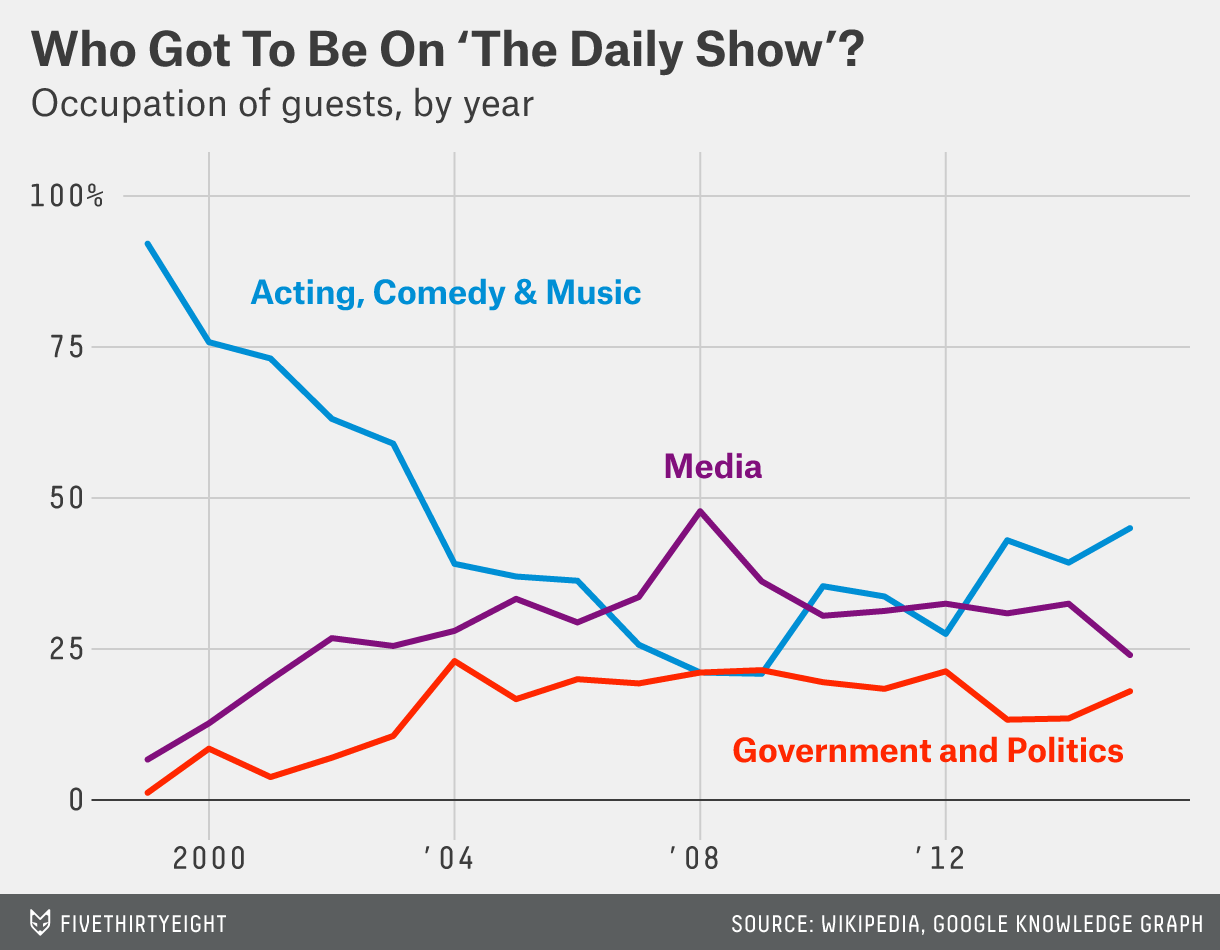

In [26]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [0]:
import seaborn as sns

In [0]:
crosstab = pd.crosstab(df['Year'], df['Occupation'])

In [29]:
ct_2 = crosstab.drop('Other', axis=1)
ct_2

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,150,2,11
2000,125,14,21
2001,114,6,31
2002,99,11,42
2003,93,17,41
2004,63,37,45
2005,60,26,54
2006,58,31,47
2007,36,24,47


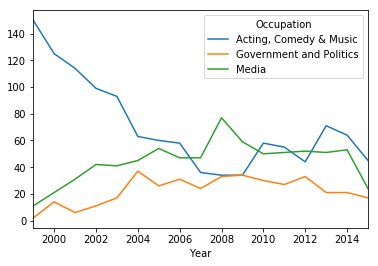

In [30]:
ct_2.plot()